In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk

# Télécharger les stopwords si ce n'est pas déjà fait
nltk.download('stopwords')

# Charger le dataset
df = pd.read_csv('hotel_reviews_combined__final.csv')
print(df.head())
print(df.info())

# On se concentre sur la colonne texte
print(df['text'].head())


   date  rating          reviewer       source  \
0   NaN     NaN          553amela  Google Maps   
1   NaN     NaN  Sabrina Deleurme  Google Maps   
2   NaN     NaN     C’pas des lol  Google Maps   
3   NaN     NaN             Nabil  Google Maps   
4   NaN     NaN     Joelle Levray  Google Maps   

                                                text                   title  
0  Un hôtel exceptionnel au cœur de Tunis !|Je le...  No Title (Google Maps)  
1  Bonjour,\r\n\r\nJe vous écris pour vous faire ...  No Title (Google Maps)  
2  Une véritable honte pour l’hôtellerie tunisien...  No Title (Google Maps)  
3  Excellent séjour au Business Hôtel !\r\nJ’ai p...  No Title (Google Maps)  
4  Très bon hôtel, très propre, service impeccabl...  No Title (Google Maps)  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      0 non-null      float64
 1  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Prétraitement du texte

On applique : minuscules, suppression ponctuation, suppression stopwords, stemming (pour le français).

Comme certains avis contiennent de l’arabe, on peut ajouter une liste de stopwords arabe si nécessaire.

In [6]:
# Stopwords français et arabe
stop_words_fr = set(stopwords.words('french'))
stop_words_ar = set(['في', 'على', 'و', 'من', 'أن', 'إلى'])

stemmer = SnowballStemmer('french')

def process_review(text):
    if pd.isnull(text):
        return []
    # minuscules
    text = text.lower()

    # suppression ponctuation et chiffres
    text = ''.join([c for c in text if c not in string.punctuation and not c.isdigit()])

    # tokenisation et suppression stopwords
    tokens = [t for t in text.split() if t not in stop_words_fr and t not in stop_words_ar]

    # stemming
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens


In [5]:
#Appliquer à la colonne 'text'
df['processed_text'] = df['text'].apply(process_review)
print(df[['text', 'processed_text']].head())


                                                text  \
0  Un hôtel exceptionnel au cœur de Tunis !|Je le...   
1  Bonjour,\r\n\r\nJe vous écris pour vous faire ...   
2  Une véritable honte pour l’hôtellerie tunisien...   
3  Excellent séjour au Business Hôtel !\r\nJ’ai p...   
4  Très bon hôtel, très propre, service impeccabl...   

                                      processed_text  
0  [hôtel, exceptionnel, cœur, tun, recommand, vi...  
1  [bonjour, écris, fair, part, immens, décept, –...  
2  [vérit, hont, l’hôteller, tunisien, cet, établ...  
3  [excellent, séjour, business, hôtel, j’ai, pas...  
4  [tres, bon, hôtel, tres, propr, servic, impecc...  


Analyse exploratoire simple

Longueur des avis après nettoyage

Mots les plus fréquents


Longueur moyenne des avis (en mots) : 16.259615384615383

Statistiques descriptives sur la longueur des avis :
count    208.000000
mean      16.259615
std        9.167254
min        1.000000
25%        8.750000
50%       17.500000
75%       23.250000
max       36.000000
Name: review_length, dtype: float64


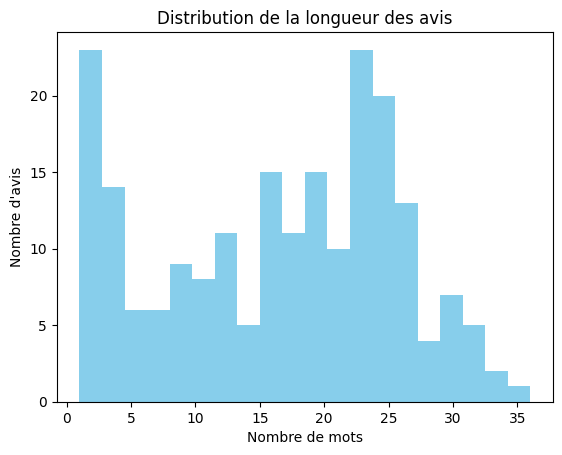

In [10]:
# longueur des avis
df['review_length'] = df['processed_text'].apply(len)
print("\nLongueur moyenne des avis (en mots) :", df['review_length'].mean())

print("\nStatistiques descriptives sur la longueur des avis :")
print(df['review_length'].describe())
# distribution des longueurs
plt.hist(df['review_length'], bins=20, color='skyblue')
plt.title('Distribution de la longueur des avis')
plt.xlabel('Nombre de mots')
plt.ylabel('Nombre d\'avis')
plt.show()


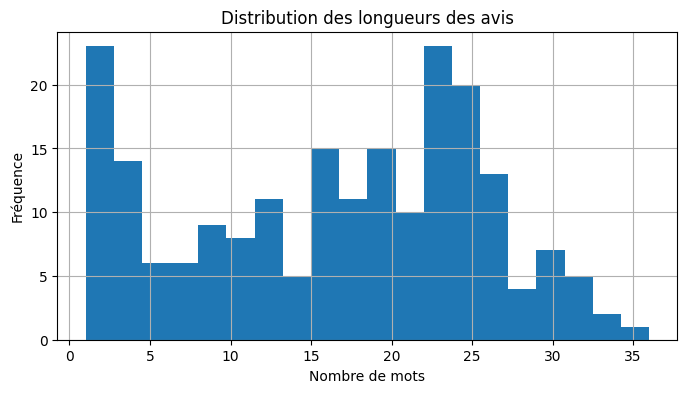

In [11]:
# Histogramme des longueurs
plt.figure(figsize=(8,4))
df['review_length'].hist(bins=20)
plt.title('Distribution des longueurs des avis')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.show()

In [12]:

# mots les plus fréquents
from collections import Counter
all_words = [word for tokens in df['processed_text'] for word in tokens]
most_common = Counter(all_words).most_common(20)
print("20 mots les plus fréquents :", most_common)

20 mots les plus fréquents : [('tres', 121), ('hôtel', 93), ('…', 77), ('personnel', 66), ('chambr', 66), ('servic', 45), ('propr', 42), ('bon', 39), ('cet', 37), ('accueil', 34), ('a', 33), ('excellent', 32), ('jai', 31), ('lhôtel', 31), ('tout', 29), ('nuit', 28), ('bien', 27), ('pass', 26), ('cest', 26), ('chaleur', 24)]


In [4]:
df_clean = df[['processed_text']].dropna()
df_clean.to_csv('hotel_reviews_prepared.csv', index=False, encoding='utf-8')
print("Dataset préparé sauvegardé !")


Dataset préparé sauvegardé !


Points clés :

Comme il n’y a pas de labels, on se concentre uniquement sur le nettoyage et la normalisation du texte.

La colonne processed_text sera utilisée pour vectorisation TF-IDF ou Word2Vec dans une étape suivante.

On peut visualiser rapidement les avis les plus courts/longs ou les mots les plus fréquents pour comprendre le dataset.